Iteration 0: Cost 0.0725
Iteration 2000: Cost 0.0031
Iteration 4000: Cost 0.0031
Iteration 6000: Cost 0.0031
Iteration 8000: Cost 0.0031
Iteration 10000: Cost 0.0031
Iteration 12000: Cost 0.0031
Iteration 14000: Cost 0.0031
Iteration 16000: Cost 0.0031
Iteration 18000: Cost 0.0031
Mean Squared Error: 0.0063
Mean Absolute Error: 0.0583
R-squared: 0.6818


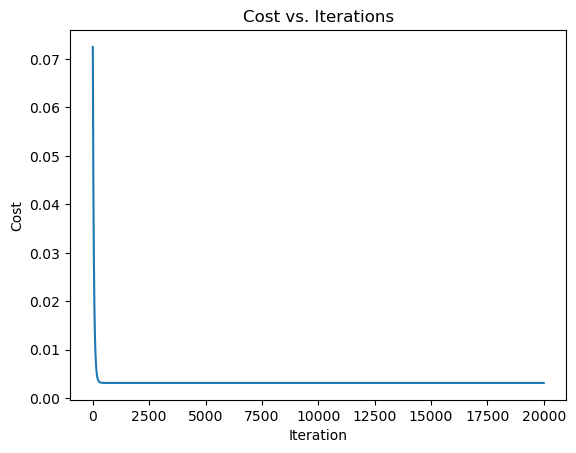

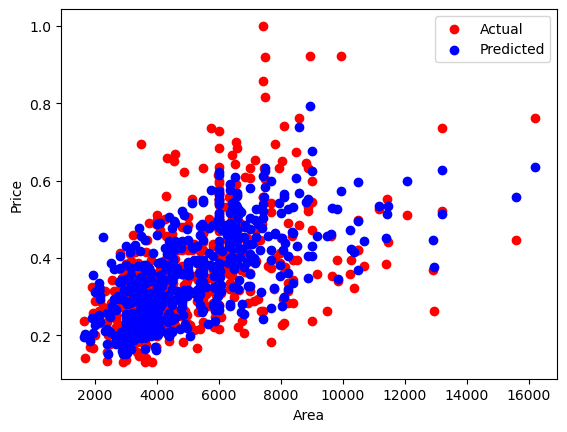

Final weights:  [ 0.03979929  0.00636412  0.03727953  0.02937957  0.01103274  0.00864288
  0.01255946  0.01345602  0.03022496  0.01793477  0.02076675 -0.00171782
 -0.01450054]
Final bias:  0.3584006953162696


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
 
df = pd.read_csv('/home/smayan/Desktop/DJS-compute-tasks/DJS-compute-tasks/Task 2/Data/housing.csv')
 
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
 
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['price']))
scaled_price = df['price'] / df['price'].max()
 
X = np.array(scaled_features)
y = np.array(scaled_price)
 
m, n = X.shape
w = np.zeros(n)
b = 0
 
def linear_model(X, w, b):
    return np.dot(X, w) + b
 
def compute_cost(X, y, w, b):
    m = len(y)
    cost = np.sum((linear_model(X, w, b) - y) ** 2) / (2 * m)
    return cost
 
def gradient_descent(X, y, w, b, alpha, iterations):
    m = len(y)
    J_history = []
 
    for i in range(iterations):
 
        y_pred = linear_model(X, w, b)
 
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
 
        w -= alpha * dw
        b -= alpha * db
 
        cost = compute_cost(X, y, w, b)
        J_history.append(cost)
 
        if i % (iterations // 10) == 0:
            print(f"Iteration {i}: Cost {cost:.4f}")
 
    return w, b, J_history
 
alpha = 0.01  
iterations = 20000
w, b, J_history = gradient_descent(X, y, w, b, alpha, iterations)
 
y_pred = linear_model(X, w, b)
 
mse = np.mean((y_pred - y) ** 2)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
 
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")
 
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()
 
plt.scatter(df['area'], y, color='red', label='Actual')
plt.scatter(df['area'], y_pred, color='blue', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()
 
print("Final weights: ", w)
print("Final bias: ", b)